In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox


In [50]:
data=np.random.exponential(scale=2,size=1000)
df=pd.DataFrame({"Salary":data})
df.head()

,Salary
0,1.949925
1,0.931381
2,0.309920
3,3.635460
4,1.205018


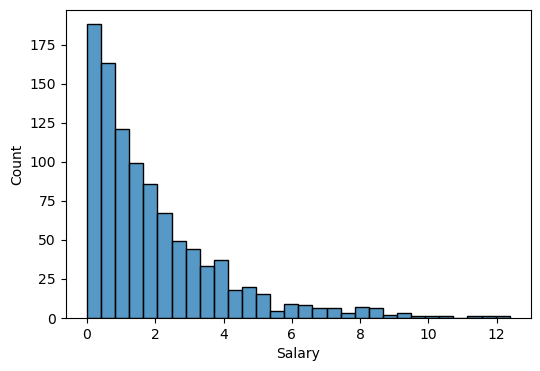

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [52]:
df.Salary.skew()

np.float64(1.8424138620442323)

In [53]:
df["updated_Salary"],lambda_val=boxcox(df.Salary)
df.head()

,Salary,updated_Salary
0,1.949925,0.730313
1,0.931381,-0.070424
2,0.309920,-1.007526
3,3.635460,1.538075
4,1.205018,0.191164


In [54]:
lambda_val

np.float64(0.2641591362235195)

In [55]:
df.updated_Salary.skew()

np.float64(-0.04189772662918205)

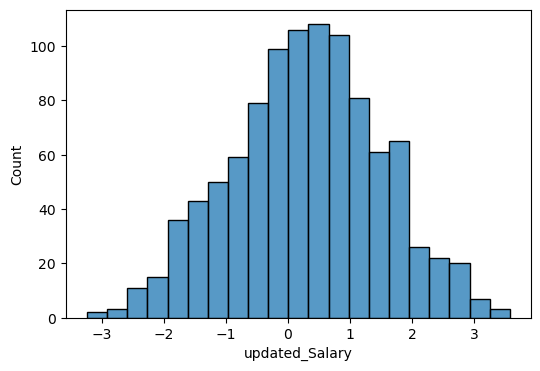

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(df.updated_Salary)
plt.show()

In [57]:
data=np.random.exponential(scale=2,size=1000)
data=10-data
df=pd.DataFrame({"Salary2":data})
df.head()

,Salary2
0,8.554423
1,9.873738
2,9.993347
3,6.057601
4,9.979588


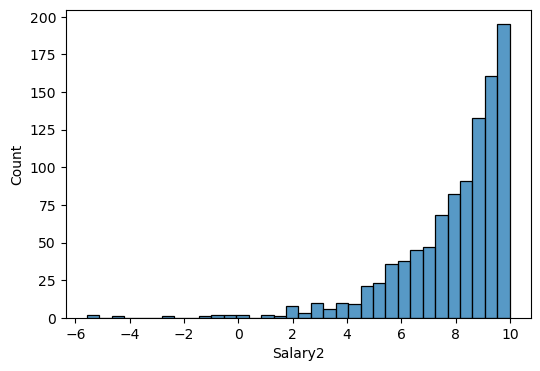

In [58]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [59]:
df.Salary2.skew()

np.float64(-2.0685516734485807)

In [60]:
df["reflex_Salary"]=df.Salary2.max()-df.Salary2+1
df.head()

,Salary2,reflex_Salary
0,8.554423,2.443688
1,9.873738,1.124373
2,9.993347,1.004764
3,6.057601,4.940510
4,9.979588,1.018523


In [61]:
max(df.reflex_Salary),min(df.reflex_Salary)

(16.56531995150457, 1.0)

In [62]:
df["transformed_Salary"]=np.log(df.reflex_Salary)


In [63]:
df.transformed_Salary.skew()

np.float64(0.4059863601736883)

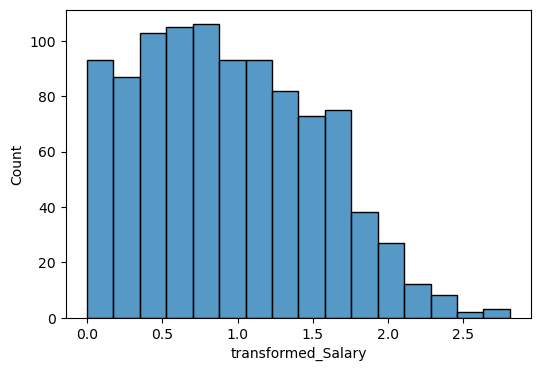

In [64]:
plt.figure(figsize=(6,4))
sns.histplot(df.transformed_Salary)
plt.show()

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [66]:
df=pd.read_csv(r"D:\test2.csv")
df

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [72]:
df["Age"].mean()

np.float64(28.8)

In [74]:
df["Age"]=df["Age"].fillna(value=df["Age"].mean())
df["Salary"]=df["Salary"].fillna(value=df["Salary"].mean())
df


,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,28.8,IT,62000.0
4,4,Eve,29.0,HR,58400.0
5,5,Alice,25.0,HR,50000.0


In [77]:
encoder=LabelEncoder()

In [80]:
df["transformed_name"]= encoder.fit_transform(df.Name)
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4


In [82]:
encoders2=OneHotEncoder(sparse_output=False)

In [85]:
encoded=encoders2.fit_transform(df[["Department"]])

In [86]:
encoders2.get_feature_names_out()


array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [87]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [91]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [92]:
scaler=StandardScaler()

In [94]:
df["Scaled_Salary"]=scaler.fit_transform(df[["Salary"]])

In [95]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,Scaled_Salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox


In [3]:
df=pd.read_csv(r"D:\data_visualization.csv")
df

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


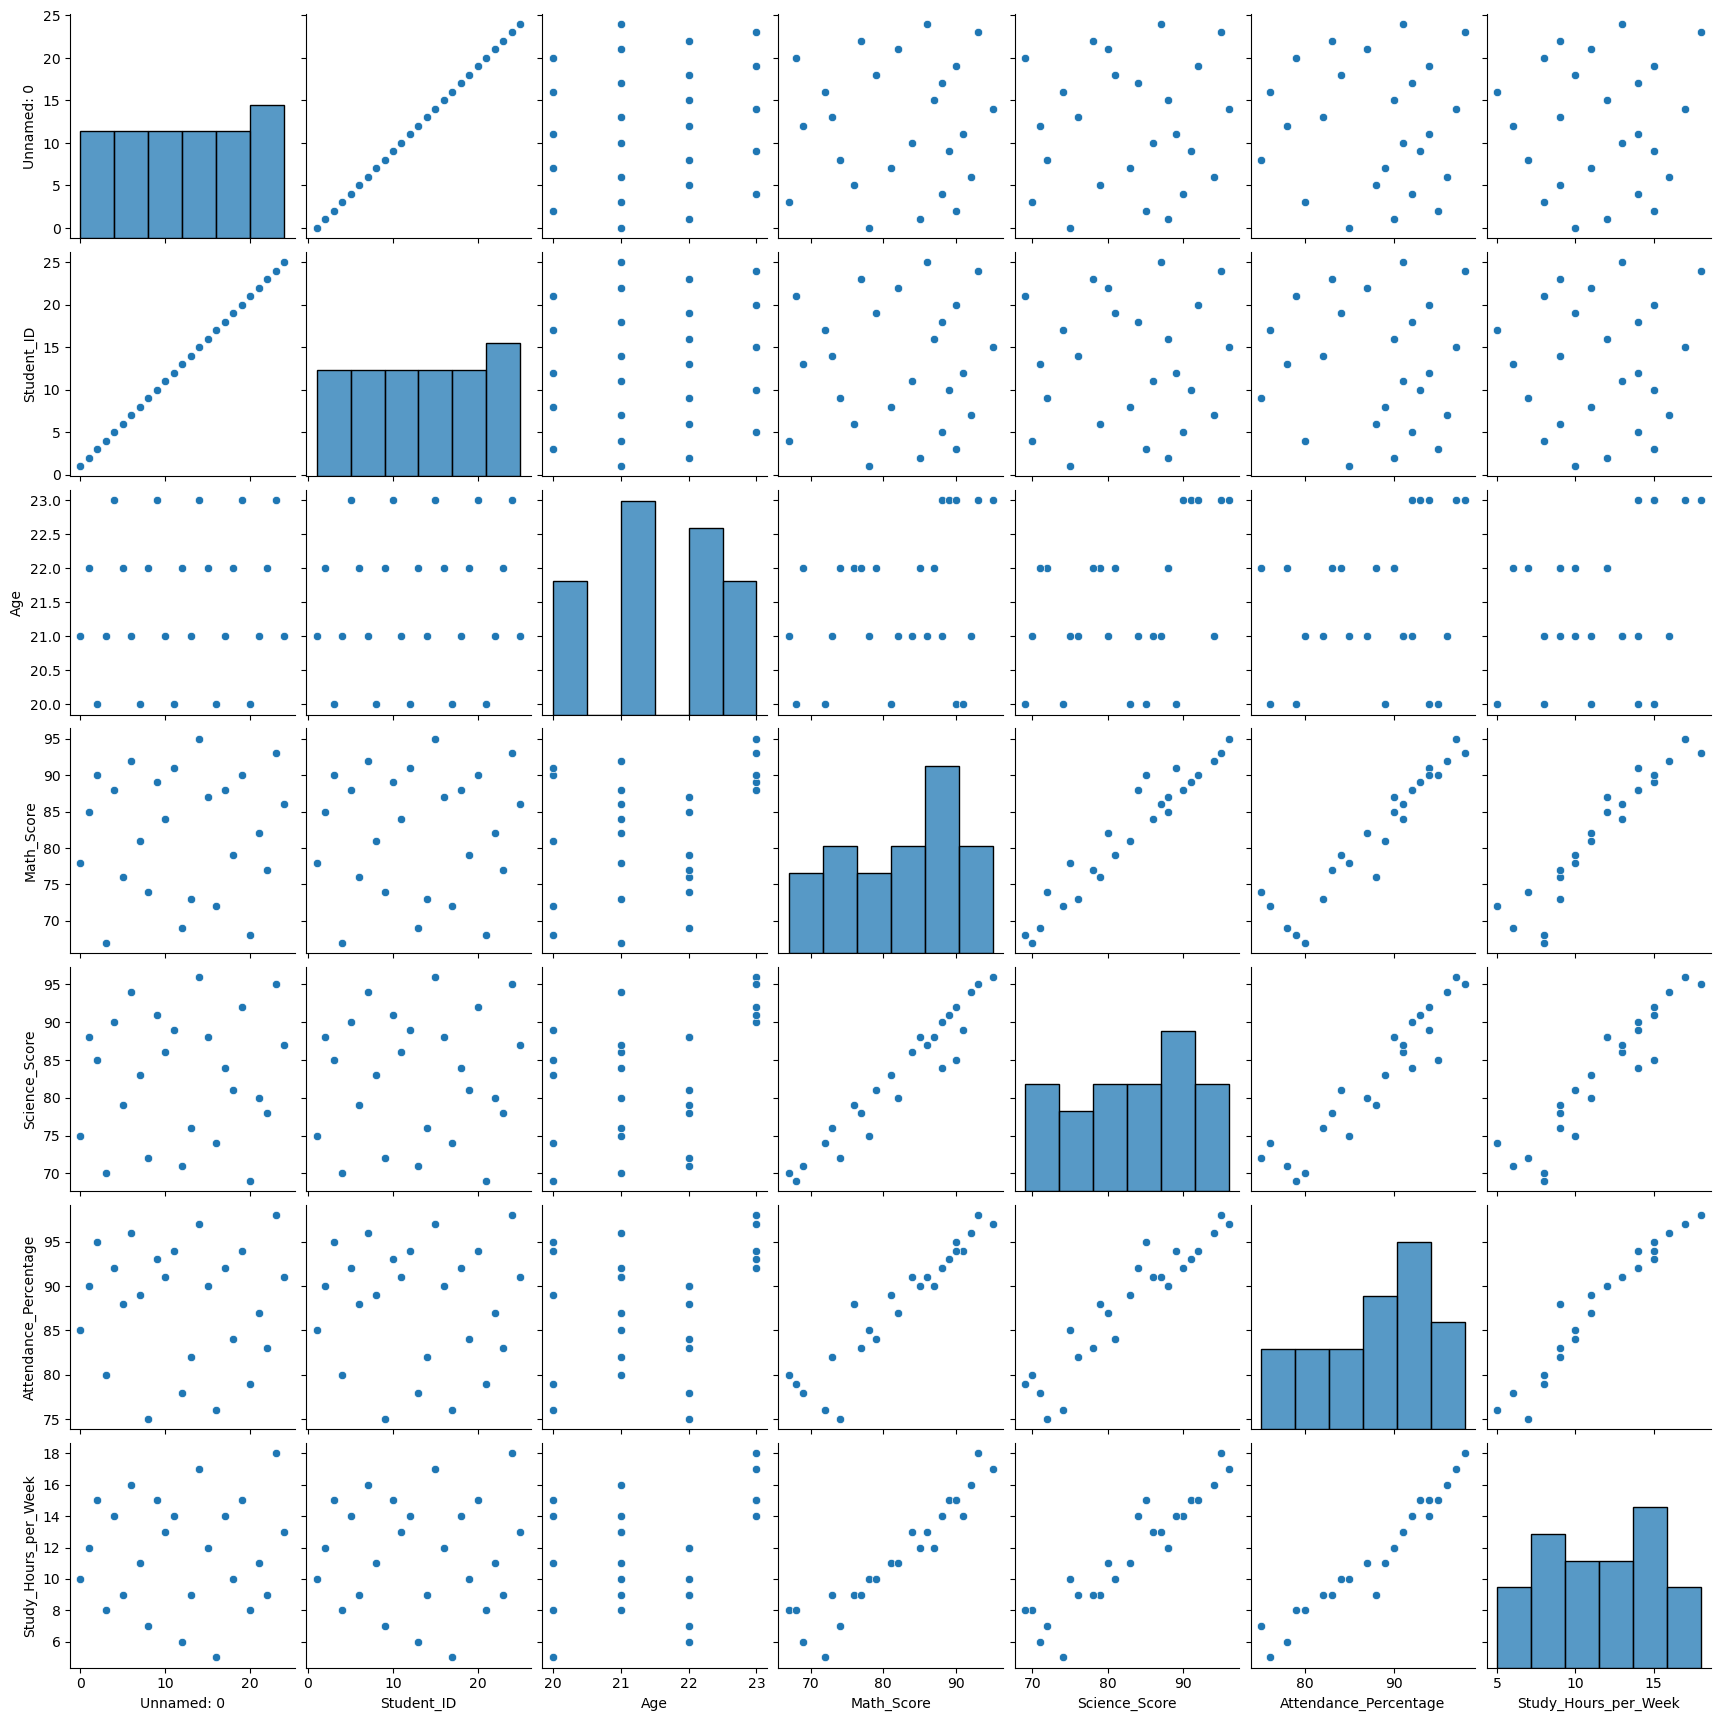

In [4]:
sns.pairplot(df)

In [5]:
plt.show()

Text(0, 0.5, 'math_score')

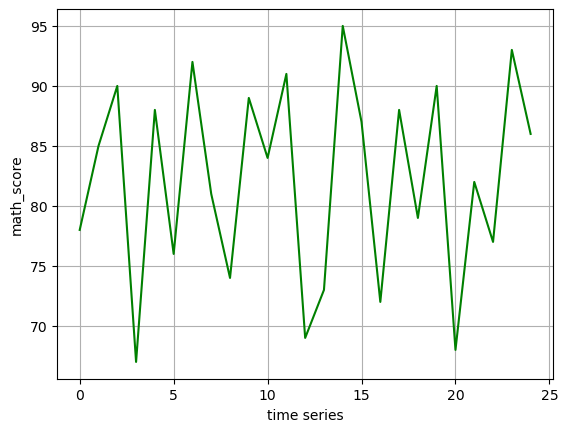

In [7]:
plt.plot(df.Math_Score,color="green")
plt.grid()
plt.xlabel("time series")
plt.ylabel("math_score")